## Projeto Predição de Insuficiência Cardiaca

<img src="http://www.bancodasaude.com/cdn/infosaude/article/insuficiencia-cardiaca.jpg" alt="drawing" width="600"/>

Olá, meu nome é Ptrick Piccini, e seja bem vindo a mais um projeto de Data Science.

O que iremos ver nesse Notebook:
- 📚 DataSet
- 🧠 Compreendendo o problema
- ⛏ Analise Exploratoria de Dados
- 🎲 Manipulação de dados
- 📊 Visualização de dados
- 😱 Insigths

# DataSet
[Heart Failure Prediction Dataset - Kaggle](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)


# Compreendendo o problema
As doenças cardiovasculares (DCVs) são a causa número 1 de morte em todo o mundo, levando cerca de 17,9 milhões de vidas a cada ano, o que representa 31% de todas as mortes em todo o mundo. Quatro das mortes por 5CVD são devido a ataques cardíacos e derrames, e um terço dessas mortes ocorre prematuramente em pessoas com menos de 70 anos de idade. A insuficiência cardíaca é um evento comum causado por DCV e este conjunto de dados contém 11 características que podem ser usadas para prever uma possível doença cardíaca.

Pessoas com doença cardiovascular ou com alto risco cardiovascular (devido à presença de um ou mais fatores de risco, como hipertensão, diabetes, hiperlipidemia ou doença já estabelecida) precisam de detecção e gerenciamento precoces, onde um modelo de aprendizado de máquina pode ser de grande ajuda.

<img src="https://lh3.googleusercontent.com/LkeF783CO8iu1R8Q3fB-Kqo9L2x6FWcEYa-5NijcXqgNjaD3gCuixMwzW9ciVlikGNrdI1c1_uemz7xCeqV7I8DCKjl9ZmcKXt3ql9A4Bd-DmIfKZbDFp-yI8O0uvlorXYSbrkuL=s0" alt="drawing" width="700"/>

### Informações de atributo
- **Age:** idade do paciente [anos]
- **Sex:** sexo do paciente [M: Masculino, F: Feminino]
- **ChestPainType:** tipo de dor no peito [TA: Angina Típica, ATA: Angina Atípica, NAP: Dor Não Anginosa, ASY: Assintomática]
- **RestingBP:** pressão arterial de repouso [mm Hg]
- **Cholesterol:** colesterol sérico [mm/dl]
- **FastingBS:** glicemia em jejum [1: se FastingBS > 120 mg/dl, 0: caso contrário]
- **RestingECG:** resultados do eletrocardiograma de repouso [Normal: normal, ST: com anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão do ST > 0,05 mV), HVE: mostrando provável ou definitiva hipertrofia ventricular esquerda pelos critérios de Estes]
- **MaxHR:** frequência cardíaca máxima alcançada [Valor numérico entre 60 e 202]
- **ExerciseAngina: angina induzida por exercício [S: Sim, N: Não]
- **Oldpeak:** pico antigo = ST [Valor numérico medido em depressão]
- **ST_Slope:** inclinação do segmento ST do exercício de pico [Up: upsloping, Flat: flat, Down: downsloping]
- **HeartDisease:** classe de saída [1: doença cardíaca, 0: normal]

## Configuração Inicial

In [196]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, precision_recall_fscore_support


heart_df = pd.read_csv('./dataset/heart.csv', sep=',')


- Iremos renomear o nome das colunas para Portugues, onde facilitará na hora do entendimento da informação dos dados.

In [197]:
columns = {
    'Age': 'Idade',
    'Sex': 'Sexo', 
    'ChestPainType': 'Tipo_Dor_Peito', 
    'RestingBP': 'RepousoPA', 
    'Cholesterol': 'Colesterol', 
    'FastingBS': 'FastingBS',
    'RestingECG': 'RestingECG', 
    'MaxHR': 'Frequencia_Cardiaca_Max', 
    'ExerciseAngina': 'Exercicio_Angina', 
    'Oldpeak': 'Pico_Antigo', 
    'ST_Slope': 'ST_Slope',
    'HeartDisease': 'Doenca_Cardiaca'
}

heart_df = heart_df.rename(columns=columns)
heart_df.head(5)

,Idade,Sexo,Tipo_Dor_Peito,RepousoPA,Colesterol,FastingBS,RestingECG,Frequencia_Cardiaca_Max,Exercicio_Angina,Pico_Antigo,ST_Slope,Doenca_Cardiaca
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Exploração

- Verificaremos a quantidade de colunas e linhas existentes no DataSet.

In [198]:
print('Colunas: %s' % heart_df.shape[1])
print('Linhas: %s' % heart_df.shape[0])

Colunas: 12
Linhas: 918


Com o comando **"describe"**, iremos obter um resumo de estatisticas descritivas do DataFrame. Isso inclui média, contagem, desvio padrão, percentis e valores mín.-máx. de todos os recursos.
com o **".T"** apenas iremos rotacionar o resultado do **"describe"**.

In [199]:
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RepousoPA,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Colesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
Frequencia_Cardiaca_Max,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Pico_Antigo,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
Doenca_Cardiaca,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


Abaixo veremos mais algumas informações referente a cada coluna do DataFrame

In [200]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Idade                    918 non-null    int64  
 1   Sexo                     918 non-null    object 
 2   Tipo_Dor_Peito           918 non-null    object 
 3   RepousoPA                918 non-null    int64  
 4   Colesterol               918 non-null    int64  
 5   FastingBS                918 non-null    int64  
 6   RestingECG               918 non-null    object 
 7   Frequencia_Cardiaca_Max  918 non-null    int64  
 8   Exercicio_Angina         918 non-null    object 
 9   Pico_Antigo              918 non-null    float64
 10  ST_Slope                 918 non-null    object 
 11  Doenca_Cardiaca          918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Limpeza

Percebemos que não ha valores NaN em nosso DataSet, porem, existem muitos valores do colesterol igual a 0(Zero). Visto isso, para não perdermos informações, subistituiremos os valores de 0(Zero) para um valor "Saudavél" sendo 130. 

Para termos uma visualização de como irá influenciar a limpeza de dados, iremos salvar os dois estados da coluna colesterol, para posteriormente plotarmos um grafico

Os como temos poucas informações,

In [201]:
print(heart_df.notna().value_counts())

Idade  Sexo  Tipo_Dor_Peito  RepousoPA  Colesterol  FastingBS  RestingECG  Frequencia_Cardiaca_Max  Exercicio_Angina  Pico_Antigo  ST_Slope  Doenca_Cardiaca
True   True  True            True       True        True       True        True                     True              True         True      True               918
dtype: int64


In [202]:
colesterol_0 = heart_df.Colesterol
heart_df.Colesterol = heart_df.Colesterol.replace(0, 130)
colesterol_no_0 = heart_df.Colesterol


# Discretização

Formar conjuntos de idade para classificação

In [203]:
print('Idade máxima: ',heart_df.Idade.max())
print('Idade MINIMA: ',heart_df.Idade.min())

Idade máxima:  77
Idade MINIMA:  28


In [204]:
# bins = [0,12,20,60,100]
# conjuto_idade = pd.cut(heart_df['Idade'].to_numpy(), bins=bins)

In [205]:
# heart_df['conjunto_idade'] = conjuto_idade

In [206]:
# heart_df['conjunto_idade'].value_counts()

# Visualização

Nesse passo da AED iremos plotar alguns graficos onde consiguiremos ter uma analise das informações um pouco mais dinamica, e com isso conseguiremos criar alguns insigths de nossas informações.

- Iremos calcular a porcentagem de casos de pessoas com Insuficiência Cardiacas e sem Insuficiência Cardiacas.

paciente com Insuficiência Cardiacas: 508
paciente sem Insuficiência Cardiaca: 410


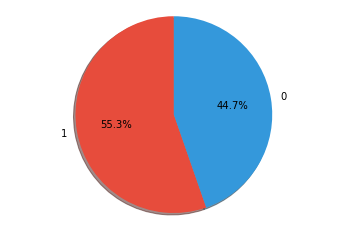

In [207]:
print("paciente com Insuficiência Cardiacas:", heart_df.query('Doenca_Cardiaca == 1').shape[0])
print("paciente sem Insuficiência Cardiaca:", heart_df.query('Doenca_Cardiaca == 0').shape[0])

labels = [1,0]
sizes = heart_df['Doenca_Cardiaca'].value_counts()
explode = (0, 0.1, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90 ,colors=['#E74C3C','#3498DB'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# heart_df['Doenca_Cardiaca'].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(8,8) );

## Quais atributos tem relação?

Atravéz de uma HeatMap(Mapa de calor), verificaremos qual as relação que os atributos tem com a coluna alvo, que no nosso caso é a _Doenca_Cardiaca_

Podemos ver que a Docença Cardiaca tem grande relação com uma "Frequência Cardiaca" alta e tambem uma relação com "Colesterol". Ha uma relação boa com "Pico Atingido","FastingBS" e "RepousoPA".

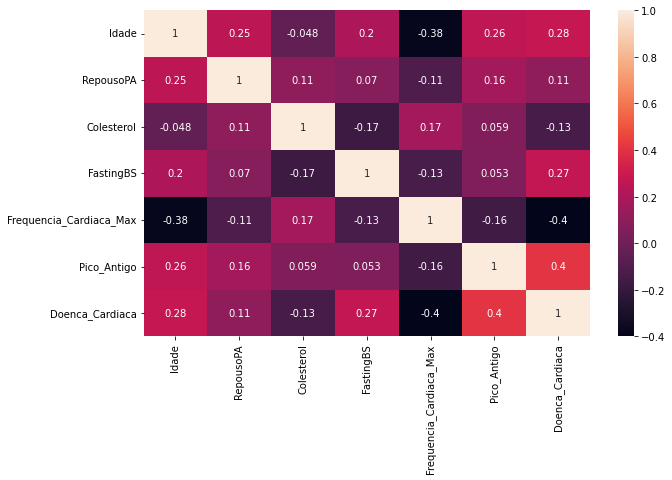

In [208]:
plt.figure(figsize=(10,6))

sns.heatmap(heart_df.corr(), annot=True)
plt.show()

## Distribuição de algumas colunas do DataSet

Vendo os graficos plotados, conseguimos perceber o volume de informações sobre determinado valor, de acordo com sua coluna.

Uma coisa que podemos notar no grafico do colestero, é que ha uma grande quantidade de dados com o valor 0 ou negativo. 
Fazendo um pesquisa rapida na internet, entende-se existe certo consenso de que valores do LDL-Colesterol (¨colesterol ruim”) menores que 40 mg/dl no sangue são considerados baixos, entretanto, estudos recentes não demonstraram efeitos colaterais graves mesmo quando esse valor foi reduzido até 25mg/dl. então esses dados zero ou negativos certamente estão errado, e com isso, podemos tratalos como **Outliers**.

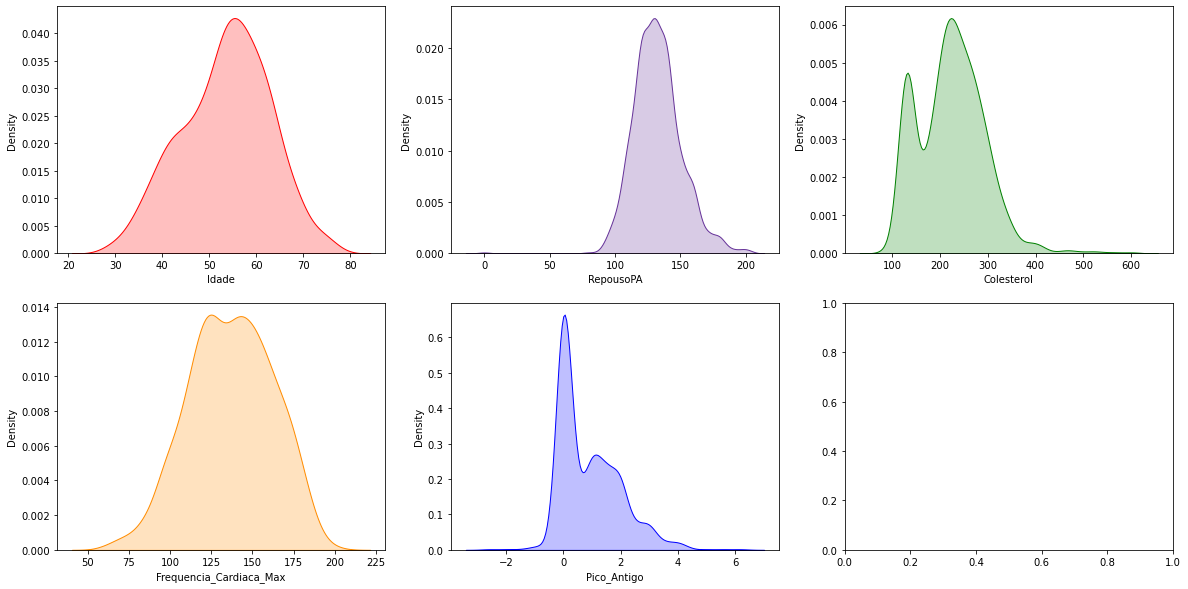

In [209]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
sns.kdeplot(heart_df['Idade'], ax = axes[0, 0] ,shade=True, color='r')
sns.kdeplot(heart_df['RepousoPA'], ax = axes[0, 1], shade=True, color='rebeccapurple')
sns.kdeplot(heart_df['Colesterol'], ax = axes[0, 2], shade=True, color='g')
sns.kdeplot(heart_df['Frequencia_Cardiaca_Max'], ax = axes[1, 0], shade=True, color='darkorange')
sns.kdeplot(heart_df['Pico_Antigo'], ax = axes[1, 1], shade=True, color='blue')
plt.show()

Antes de continuarmos, vamos ver a diferença dos graficos referente ao Colesterol, visto que tivemos alguns valores modificados no passo de Limpeza dos dados.
Apenas relemrando, trocamos os valores 0 do colesterol, para um valor "saudavel" sendo ela 130.

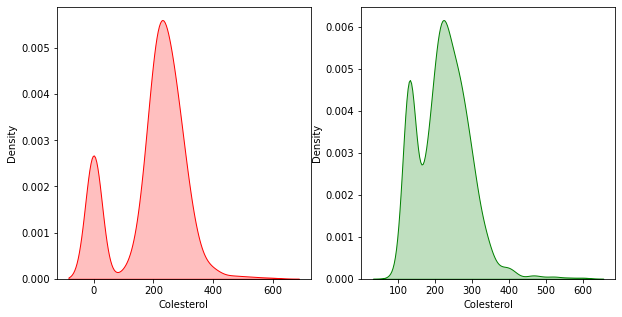

In [210]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.kdeplot(colesterol_0, ax = axes[0], shade=True, color='r')
sns.kdeplot(colesterol_no_0, ax = axes[1], shade=True, color='g')
plt.show()

# Calculo de Insuficiência Cardiaca por Sexo

<AxesSubplot:xlabel='ST_Slope', ylabel='count'>

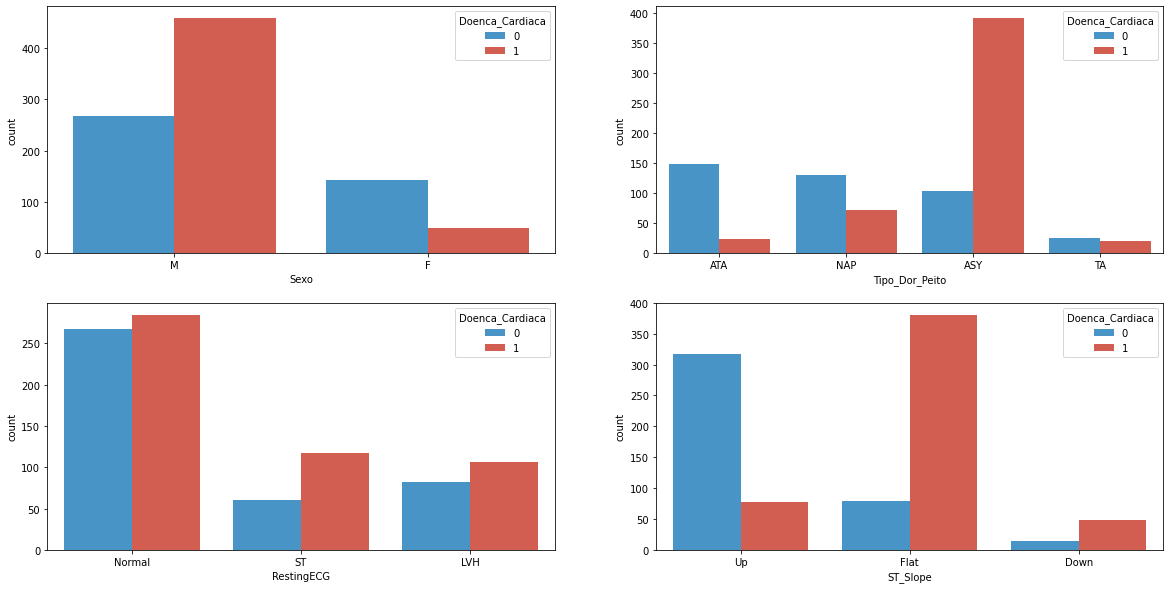

In [211]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

sns.countplot(x="Sexo", hue="Doenca_Cardiaca", data=heart_df, ax=axes[0, 0] ,palette=['#3498DB','#E74C3C'])
sns.countplot(x="Tipo_Dor_Peito", hue="Doenca_Cardiaca", data=heart_df, ax=axes[0, 1] ,palette=['#3498DB','#E74C3C'])
sns.countplot(x="RestingECG", hue="Doenca_Cardiaca", data=heart_df, ax=axes[1, 0] ,palette=['#3498DB','#E74C3C'])
sns.countplot(x="ST_Slope", hue="Doenca_Cardiaca", data=heart_df, ax=axes[1, 1] ,palette=['#3498DB','#E74C3C'])

### Grafico Sexo
Podemos perceber Homens tem maiores chances de ter Insuficiencia Cardiaca mesmo que tenham maior volume de dados.
Ja as Mulheres tem maiores chances de NÃO ter algum problema cardiaco. Nota-se que os valores de casos sem a doença chegar ser 3/4 do cojunto de Mulheres

### Grafico Tipo de dor no peito
- TA: Angina Típica, ATA: Angina Atípica, NAP: Dor Não Anginosa, ASY: Assintomática
Nota-se que de toda a classe Tipo_Dor_Peito a que mais se destaca é o classificador ASY, que representa uma dor Assintomática em outras palavras, uma dor com poucos sintomas, ou pouco visivel. Vemos que o risco de ter insuficiência cardiaca é extremamente alta contendo esse tipo de dor.

No tipo TA, mesmo tendo um pequeno volume de dados, percebe-se que a quantidade de casos com e sem insuficiência é quase balanceado. Para esses casos deve-se ter mais atenção na hora dos diagnostigos para que o paciente não seja clasificado sem a doença cardiaca.

Devemos perceber que nos tipos NAP e ATA temos um menor volume de dados contendo Insuficiência Cardiaca comparado com ASY e TA.

### RestingECG
- Resultados do eletrocardiograma de repouso
[Normal: normal, ST: com anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão do ST > 0,05 mV), HVE: mostrando provável ou definitiva hipertrofia ventricular esquerda pelos critérios de Estes]

Identifica-se que a maioria dos pacientes, independente do resultado do eletrocardiograma, possuem chances de ter algum problema cardíaco.

### Grafico ST_Stope
- Exame de Teste de esforço
- ST_Slope: inclinação do segmento ST do exercício de pico [Up: upsloping, Flat: flat, Down: downsloping]
Nos resultados do ST_Stope pessoas com segmento ST maiores(UP), não tendem a ter insuficiencia cardiaca, visto que os bastimentos estão com um BPM alto.

Se mesmo no Teste de esforço físico o segmento ST estiver sem muita variação(Flat), a tendencia a ter insuficiência cardiaca é bem alta.
A mesma coisa quando o segmento ST estiver baixo(Down).

# Inicio de Treinamento de Modelos

## Desision Tree Train

- Apontamento de classe alvo 'y'

In [212]:
y = heart_df['Doenca_Cardiaca'].values
heart_df.drop(columns=['Doenca_Cardiaca'], inplace=True)

In [213]:
X = heart_df

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [215]:
for c in X_test.columns:
    if type(X_test[c].iloc[0]) == str:
        X_test[c] = X_test[c].astype('category')
        X_test[c] = X_test[c].cat.codes
        
for c in X_train.columns:
    if type(X_train[c].iloc[0]) == str:
        X_train[c] = X_train[c].astype('category')
        X_train[c] = X_train[c].cat.codes

In [216]:
tree_view_train = DecisionTreeClassifier(random_state=0, max_depth=4)

# .fit é o comando de treinamento(lembre de fitness. o que treina)
model = tree_view_train.fit(X_train, y_train)
prediction_tree_train = model.predict(X_train)

In [217]:
# nome_features = X_train.columns

# plt.figure(figsize=(24,11))

# plt.title('treino')
# tree.plot_tree(model, label=None, node_ids=True, rounded=True, fontsize=9, feature_names=nome_features, filled=True, class_names=['0','1'], proportion=True)
# plt.show()

# Decision Tree Test

In [218]:
tree_view_test = DecisionTreeClassifier(random_state=0, max_depth=4)

prediction_tree = model.predict(X_test)

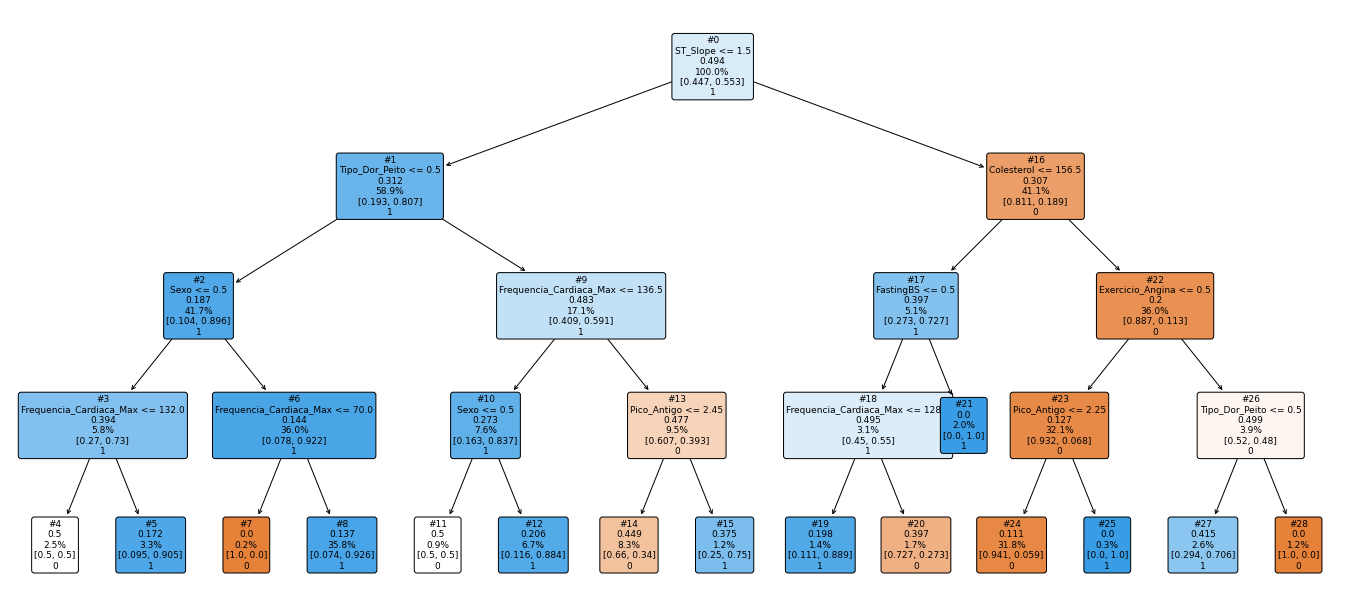

In [219]:
nome_features = X_test.columns

plt.figure(figsize=(24,11))

plt.title('teste')
tree.plot_tree(model, label=None, node_ids=True, rounded=True, fontsize=9, feature_names=nome_features, filled=True, class_names=['0','1'], proportion=True)
# plt.savefig('decision_tree.png', format='png')
plt.show()

In [220]:
accuracy = accuracy_score(y_test, prediction_tree)
print('Valor Acuracia: ',accuracy)
print(classification_report(y_test, prediction_tree))

Valor Acuracia:  0.822463768115942
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       123
           1       0.88      0.79      0.83       153

    accuracy                           0.82       276
   macro avg       0.82      0.83      0.82       276
weighted avg       0.83      0.82      0.82       276



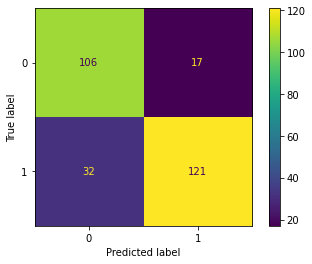

In [221]:
cm = confusion_matrix(y_test, prediction_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Randon Forest Train
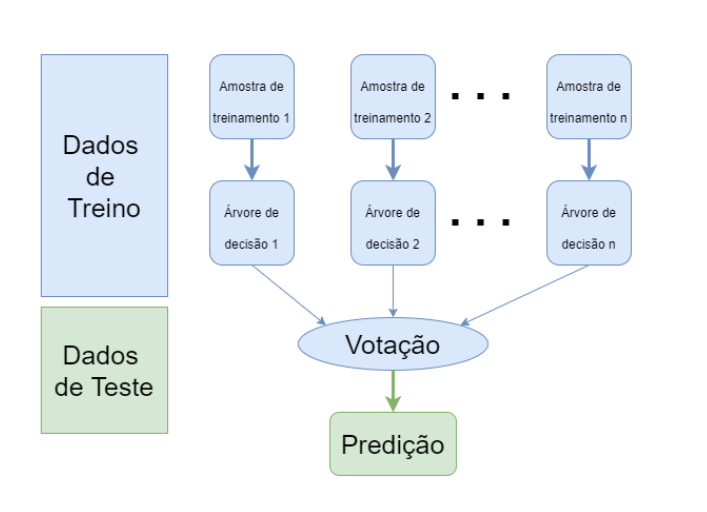

In [222]:
SEED=42
randon_forest_train = RandomForestClassifier(max_depth= 5, random_state = SEED)

In [223]:
model_rando_forest = randon_forest_train.fit(X_train, y_train)
prediction_rf_train = randon_forest_train.predict(X_train)

accuracy = accuracy_score(y_train, prediction_rf_train)
print('Valor Acuracia: ',accuracy)
print(classification_report(y_train, prediction_rf_train))

Valor Acuracia:  0.9080996884735203
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       287
           1       0.90      0.94      0.92       355

    accuracy                           0.91       642
   macro avg       0.91      0.90      0.91       642
weighted avg       0.91      0.91      0.91       642



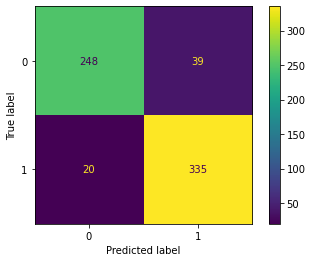

In [224]:
cm = confusion_matrix(y_train, prediction_rf_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Randon Rorest Train

In [225]:
prediction_rf = model_rando_forest.predict(X_test)

accuracy = accuracy_score(y_test, prediction_rf)
print('Valor Acuracia: ',accuracy)
print(classification_report(y_test, prediction_rf))

Valor Acuracia:  0.855072463768116
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       123
           1       0.87      0.86      0.87       153

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.86      0.86      0.86       276



- Matrix Confusão Randon Forest

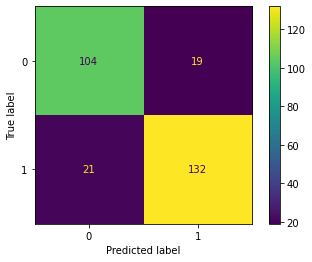

In [226]:
cm = confusion_matrix(y_test, prediction_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Logistic Regression Train

In [227]:
lr = LogisticRegression(max_iter = 1000 ,random_state = 0)

In [228]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [229]:
y_preds = lr.predict(X_train)

In [230]:
y_accuracy = accuracy_score(y_train, y_preds)
print("Acurácia:", y_accuracy)

print(classification_report(y_train, y_preds))

Acurácia: 0.839563862928349
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       287
           1       0.85      0.86      0.86       355

    accuracy                           0.84       642
   macro avg       0.84      0.84      0.84       642
weighted avg       0.84      0.84      0.84       642



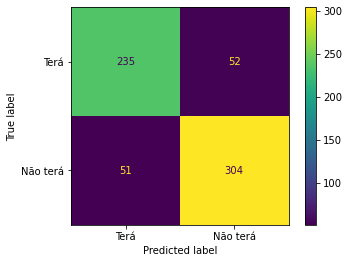

In [231]:
cm = confusion_matrix(y_train, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Terá", "Não terá"])
disp.plot()

# GaussianNB Train

In [232]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_preds = gnb.predict(X_train)

In [233]:
y_accuracy = accuracy_score(y_train, y_preds)
print("Acurácia:", y_accuracy)

print(classification_report(y_train, y_preds))

Acurácia: 0.8613707165109035
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       287
           1       0.88      0.87      0.87       355

    accuracy                           0.86       642
   macro avg       0.86      0.86      0.86       642
weighted avg       0.86      0.86      0.86       642



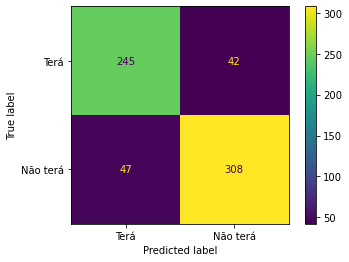

In [234]:
cm = confusion_matrix(y_train, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Terá", "Não terá"])
disp.plot()

# Cross-Validation

A escolha da validação cruzada correta depende do conjunto de dados com o qual você está lidando, e a escolha da validação cruzada em um conjunto de dados pode ou não se aplicar a outros conjuntos de dados. No entanto, existem alguns tipos de técnicas de validação cruzada que são as mais populares e amplamente utilizadas. Esses incluem:

- validação cruzada k-fold
- validação cruzada estratificada em k-fold A validação cruzada é dividir os dados de treinamento em algumas partes. Treinamos o modelo em algumas dessas peças e testamos nas demais

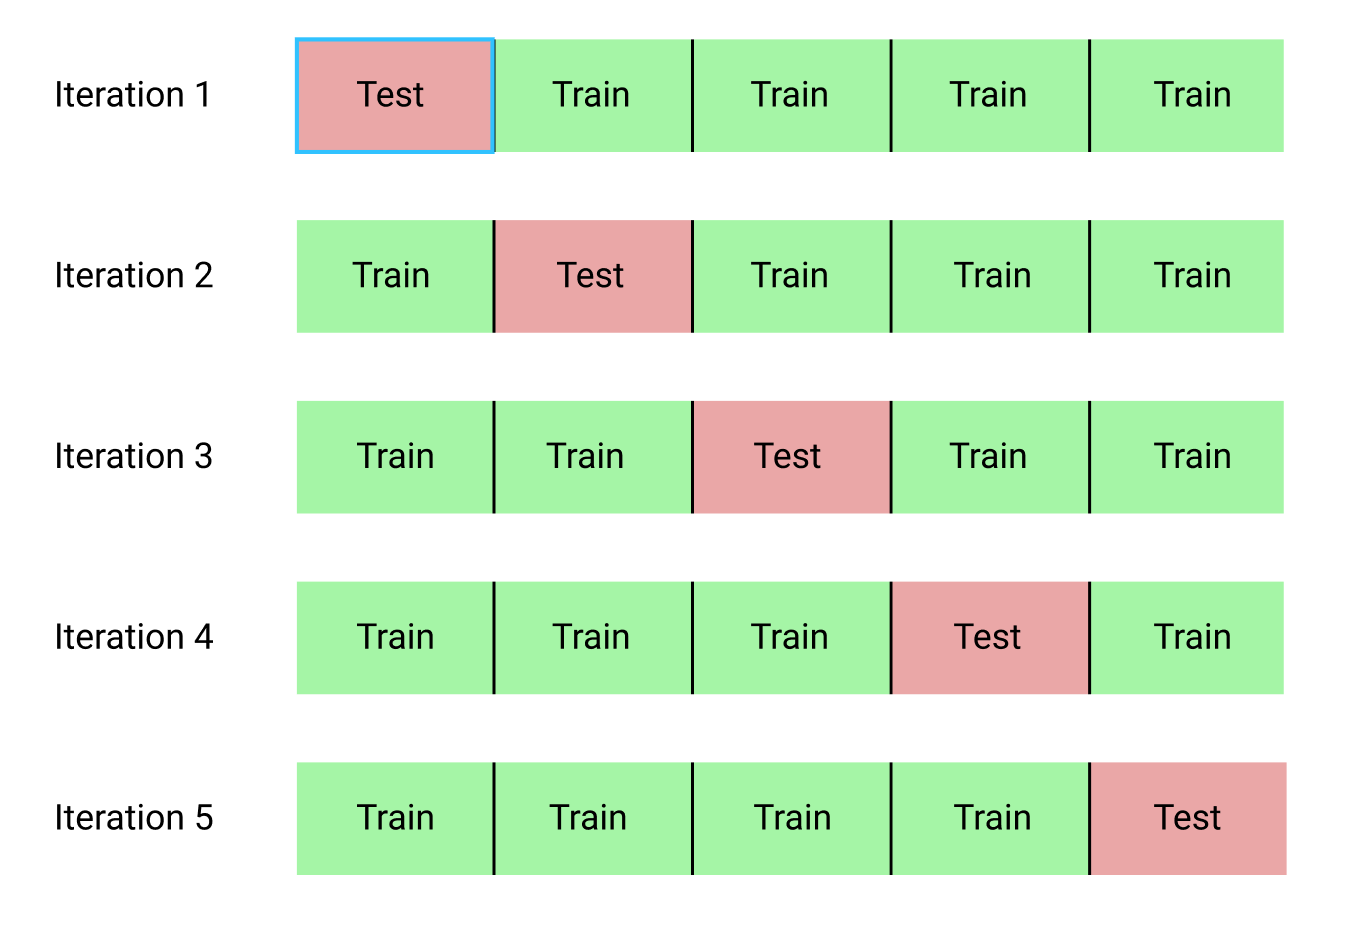



## Criação de objeto de classificadores

In [235]:
classifiers = {'Arvore': DecisionTreeClassifier(random_state=0, max_depth=4),
               'Random Forest': RandomForestClassifier(max_depth= 5, random_state = SEED),
               'Naive Bayes': GaussianNB(),
               'Regressão Logistica': LogisticRegression(max_iter = 1000 ,random_state = 0),
              }

In [236]:
for c in X_train.columns:
    if X_train[c].dtype == "object":
        X_train[c] = X_train[c].astype('category')
        X_train[c] = X_train[c].cat.codes

In [237]:
for clf in classifiers.items():
    clf[1].fit(X_train, y_train)
    preds = clf[1].predict(X_test)
    score = accuracy_score(preds, y_test)
    print(f'\n------{clf[0]}------')
    print("Acurácia:",accuracy_score(y_test, preds))
    print("Precisão:",precision_score(y_test, preds))
    print("Recall:",recall_score(y_test, preds))
    print("F1:",f1_score(y_test, preds))


------Arvore------
Acurácia: 0.822463768115942
Precisão: 0.8768115942028986
Recall: 0.7908496732026143
F1: 0.831615120274914

------Random Forest------
Acurácia: 0.855072463768116
Precisão: 0.8741721854304636
Recall: 0.8627450980392157
F1: 0.868421052631579

------Naive Bayes------
Acurácia: 0.8442028985507246
Precisão: 0.9044117647058824
Recall: 0.803921568627451
F1: 0.8512110726643598

------Regressão Logistica------
Acurácia: 0.8514492753623188
Precisão: 0.9057971014492754
Recall: 0.8169934640522876
F1: 0.859106529209622


In [238]:
preds = []
clf_trained = []
names=[]
for clf in classifiers.items():
    clf_atual = clf[1].fit(X_train, y_train)
    clf_trained.append(clf_atual)

    pred_atual=clf[1].predict(X_test)
    preds.append(pred_atual)
    names.append(clf[0])
    
    print(precision_recall_fscore_support(y_test, pred_atual, average='macro'))

(0.822463768115942, 0.8263191455443966, 0.8219378283366907, None)
(0.8530860927152317, 0.8541367766618844, 0.8535653650254669, None)
(0.845063025210084, 0.8491152558584409, 0.843856486902522, None)
(0.8514492753623188, 0.8556512035708592, 0.851009203302129, None)


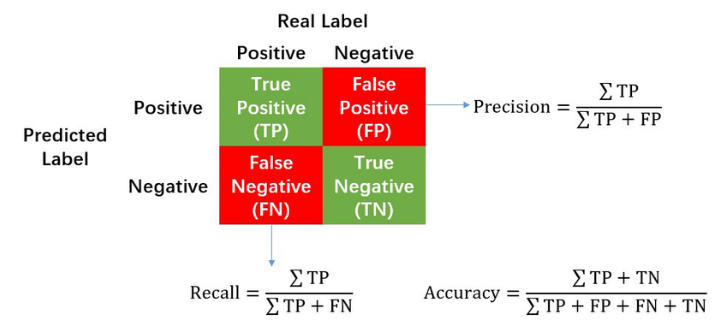

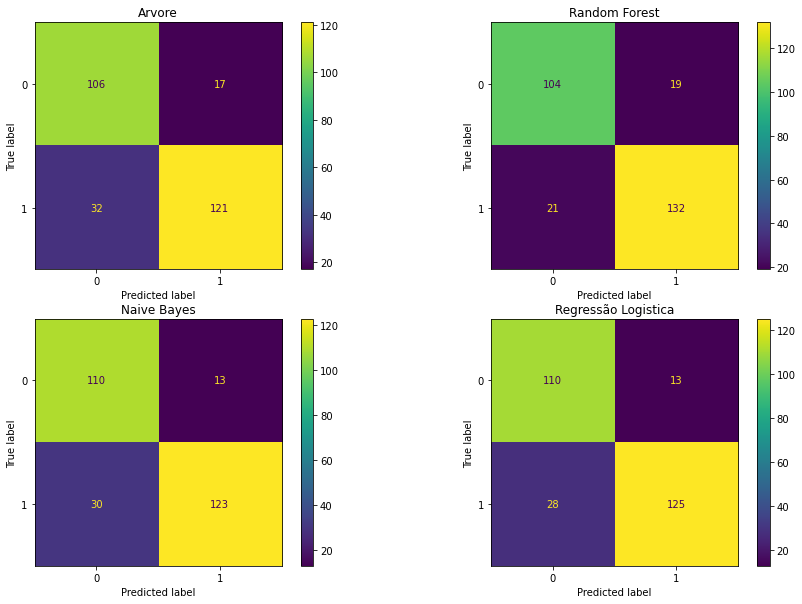

In [239]:
fig, axs =  plt.subplots(2, 2, figsize=(15, 10))
position = [axs[0,0],axs[0,1],axs[1,0],axs[1,1]]

for i in range(len(classifiers)):
    cm = confusion_matrix(y_test, preds[i], labels=clf_trained[i].classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_trained[i].classes_)
    position[i].set_title(names[i])
    disp.plot(ax=position[i])
    
plt.show()

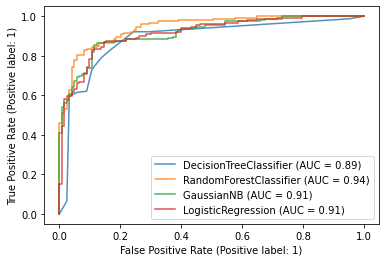

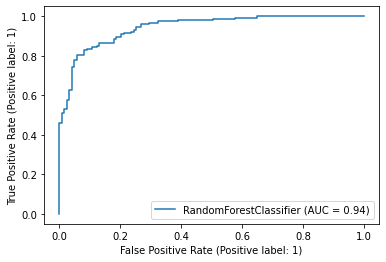

In [240]:
ax = plt.gca()
for i in range(len(classifiers)):
    clf = classifiers[names[i]]      
    rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax, alpha=0.8)
plt.show()
    
clf2 = classifiers['Random Forest']
svc_disp = RocCurveDisplay.from_estimator(clf2, X_test, y_test)
svc_disp.plot(ax=ax, alpha=0.8)
plt.show()